### hw02_a: Terrain Simplification

**Exploratory analysis of example dataset and *point-by-point* differences.**

In [1]:
import os
import glob

import numpy as np
import pandas as pd
#from osgeo import gdal, osr

import seaborn as sns
import matplotlib.pyplot as plt

**.xyz with NaN removed from original dataset** [here](https://3d.bk.tudelft.nl/courses/backup/geo1015/2018/hw/02/) 

In [2]:
f = './NoNaN.xyz'
df = pd.read_csv(f, delimiter=' ', header='infer')
df.describe()

,x,y,z
count,4405.000000,4.405000e+03,4405.000000
mean,267566.481940,4.179535e+06,1825.154143
std,537.450723,5.256690e+02,431.602674
min,266623.040000,4.178614e+06,1207.000000
25%,267107.403000,4.179067e+06,1335.000000
50%,267566.274000,4.179520e+06,1967.000000
75%,268025.144000,4.180003e+06,2247.000000
max,268509.507000,4.180455e+06,2385.000000


In [3]:
df.head(2)

,x,y,z
0,266674.025,4180455.401,2266
1,266699.518,4180455.401,2270


In [4]:
print('diff x:', df.x.min() - df.x.max())
print('diff y:', df.y.min() - df.y.max())
print('diff z:', df.z.min() - df.z.max())

diff x: -1886.4670000000042
diff y: -1841.0640000002459
diff z: -1178


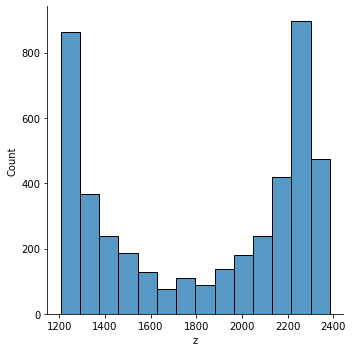

In [5]:
sns.displot(df.z)
plt.show()

In [6]:
extent = x_min, x_max, y_min, y_max = [df.x.min()-250, 
                                       df.x.max()+250,
                                       df.y.min()-250, 
                                       df.y.max()+250]

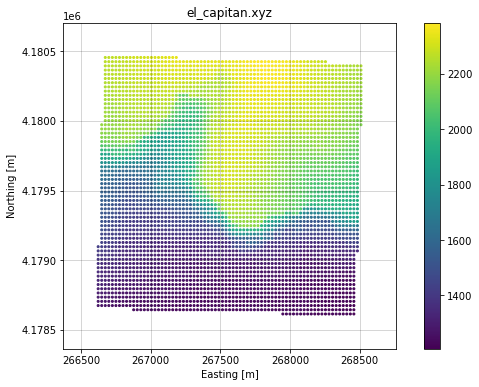

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

cm = ax.scatter(df.x, df.y, c=df.z, 
                s=4)
ax.set_aspect(1)
ax.set_xlim(*extent[:2])
ax.set_ylim(*extent[2:])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('el_capitan.xyz')
ax.grid(c='k', alpha=0.2)
fig.colorbar(cm)

plt.show()

### Difference 
~ between original grid and values interpolated at the same location for each threshold TIN

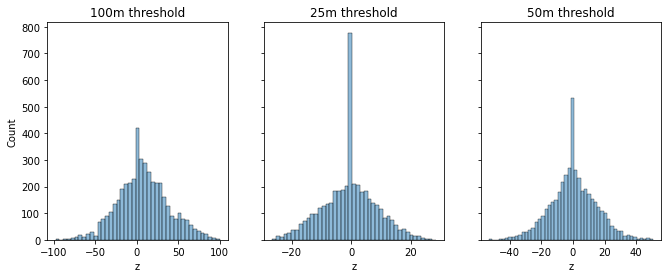

In [13]:
files = glob.glob(os.path.join('./diff_*.csv'))
df_list = [pd.read_csv(file, delimiter=' ', header='infer') for file in files]

char1 = '_'
char2 = '.csv'

fig, ax = plt.subplots(1, 3, figsize=(11,4), sharey=True)
for df, ax, f in zip(df_list, fig.get_axes(), files):
    sns.histplot(df.z, alpha=0.5, edgecolor = 'black', ax=ax)
    #ax.set_title(str(f.partition("diff_")[2]))
    ax.set_title(f[f.find(char1)+1 : f.find(char2)] + ' threshold')
plt.show()